In [1]:
import numpy as np
import pandas as pd
import joblib


**Explore the data**

In [2]:
df= pd.read_csv(r"C:\Users\Lenovo\Muskan\Ml\final project\framingham.csv")

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [6]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

**droping data which is not required for prediction**

In [7]:
df=df.drop("education",axis=1)

In [8]:
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


**Filling NAN values**

In [9]:
df['cigsPerDay']=df['cigsPerDay'].fillna(df['cigsPerDay'].mean())

In [10]:
df['BPMeds']=df['BPMeds'].fillna(df['BPMeds'].mean())

In [11]:
df['totChol']=df['totChol'].fillna(df['totChol'].mean())

In [12]:
df['glucose']=df['glucose'].fillna(df['glucose'].mean())

In [13]:
df['BMI']=df['BMI'].fillna(df['BMI'].mean())

In [14]:
df['heartRate']=df['heartRate'].fillna(df['heartRate'].mean())

In [15]:
df.isna().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [16]:
df.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.00000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,0.494101,9.003089,0.02963,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,0.500024,11.879230,0.16852,0.076587,0.462763,0.158316,44.326453,22.038097,11.910850,4.070953,12.025177,22.836603,0.359023
min,0.000000,32.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.00000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.00000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


**Data Preprocessing**

In [17]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
scaler= MinMaxScaler()# define min

In [18]:
df['age']=scaler.fit_transform(df[['age']])
df['cigsPerDay']=scaler.fit_transform(df[['cigsPerDay']])
df['totChol']=scaler.fit_transform(df[['totChol']])
df['sysBP']=scaler.fit_transform(df[['sysBP']])
df['diaBP']=scaler.fit_transform(df[['diaBP']])
df['BMI']=scaler.fit_transform(df[['BMI']])
df['heartRate']=scaler.fit_transform(df[['heartRate']])
df['glucose']=scaler.fit_transform(df[['glucose']])

In [19]:
df.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.00000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,0.462762,0.494101,0.128616,0.02963,0.005899,0.310524,0.025720,0.220240,0.230981,0.369243,0.248716,0.322009,0.118550,0.151958
std,0.495022,0.225583,0.500024,0.169703,0.16852,0.076587,0.462763,0.158316,0.075257,0.104199,0.126041,0.098666,0.121466,0.064510,0.359023
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.263158,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.168081,0.158392,0.285714,0.182744,0.242424,0.090395,0.000000
50%,0.000000,0.447368,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.215620,0.210402,0.359788,0.239215,0.313131,0.112994,0.000000
75%,1.000000,0.631579,1.000000,0.285714,0.00000,0.000000,1.000000,0.000000,0.263158,0.286052,0.443122,0.302896,0.393939,0.127119,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Selected model**
**(Logistic regression,**
**Decision tree,**
**Random Forest)**

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [21]:
features=["male","age","currentSmoker","cigsPerDay","BPMeds","prevalentStroke","prevalentHyp","diabetes","totChol","sysBP","diaBP","BMI","heartRate","glucose"]
x=df[features].values
y=df["TenYearCHD"].values

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)


**prepruning in decision tree**

In [24]:
parameter ={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,6],
    'max_features':['auto','sqrt','log2']
}

In [26]:
from sklearn.model_selection import GridSearchCV

In [29]:
DTmodel = DecisionTreeClassifier()
cv=GridSearchCV(DTmodel,param_grid= parameter,cv=5,scoring='accuracy')

In [30]:
cv.fit(x_train, y_train)

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\loca

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [31]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'random'}

In [68]:
DTy_pred=cv.predict(x_test)

In [69]:
from sklearn.metrics import accuracy_score,classification_report

In [97]:
score=accuracy_score(DTy_pred,y_test)

In [98]:
score

0.8577044025157232

In [100]:
print(classification_report(DTy_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92      1270
           1       0.01      1.00      0.02         2

    accuracy                           0.86      1272
   macro avg       0.51      0.93      0.47      1272
weighted avg       1.00      0.86      0.92      1272



**apply all the fetures in desicion tree**

In [73]:

LRmodel = LogisticRegression()
RCmodel = RandomForestClassifier()

LRmodel.fit(x_train, y_train)
RCmodel.fit(x_train, y_train)

RandomForestClassifier()

[Text(0.5, 0.875, 'x[7] <= 0.774\ngini = 0.263\nsamples = 2966\nvalue = [2505, 461]'),
 Text(0.25, 0.625, 'x[9] <= 0.265\ngini = 0.255\nsamples = 2888\nvalue = [2454, 434]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[0] <= 0.87\ngini = 0.201\nsamples = 2025\nvalue = [1796, 229]'),
 Text(0.0625, 0.125, 'gini = 0.167\nsamples = 1128\nvalue = [1024, 104]'),
 Text(0.1875, 0.125, 'gini = 0.24\nsamples = 897\nvalue = [772, 125]'),
 Text(0.375, 0.375, 'x[12] <= 0.31\ngini = 0.362\nsamples = 863\nvalue = [658, 205]'),
 Text(0.3125, 0.125, 'gini = 0.407\nsamples = 306\nvalue = [219, 87]'),
 Text(0.4375, 0.125, 'gini = 0.334\nsamples = 557\nvalue = [439.0, 118.0]'),
 Text(0.75, 0.625, 'x[6] <= 0.469\ngini = 0.453\nsamples = 78\nvalue = [51, 27]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[1] <= 0.505\ngini = 0.363\nsamples = 42\nvalue = [32, 10]'),
 Text(0.5625, 0.125, 'gini = 0.245\nsamples = 21\nvalue = [18, 3]'),
 Text(0.6875, 0.125, 'gini = 0.444\nsamples = 21\nvalue =

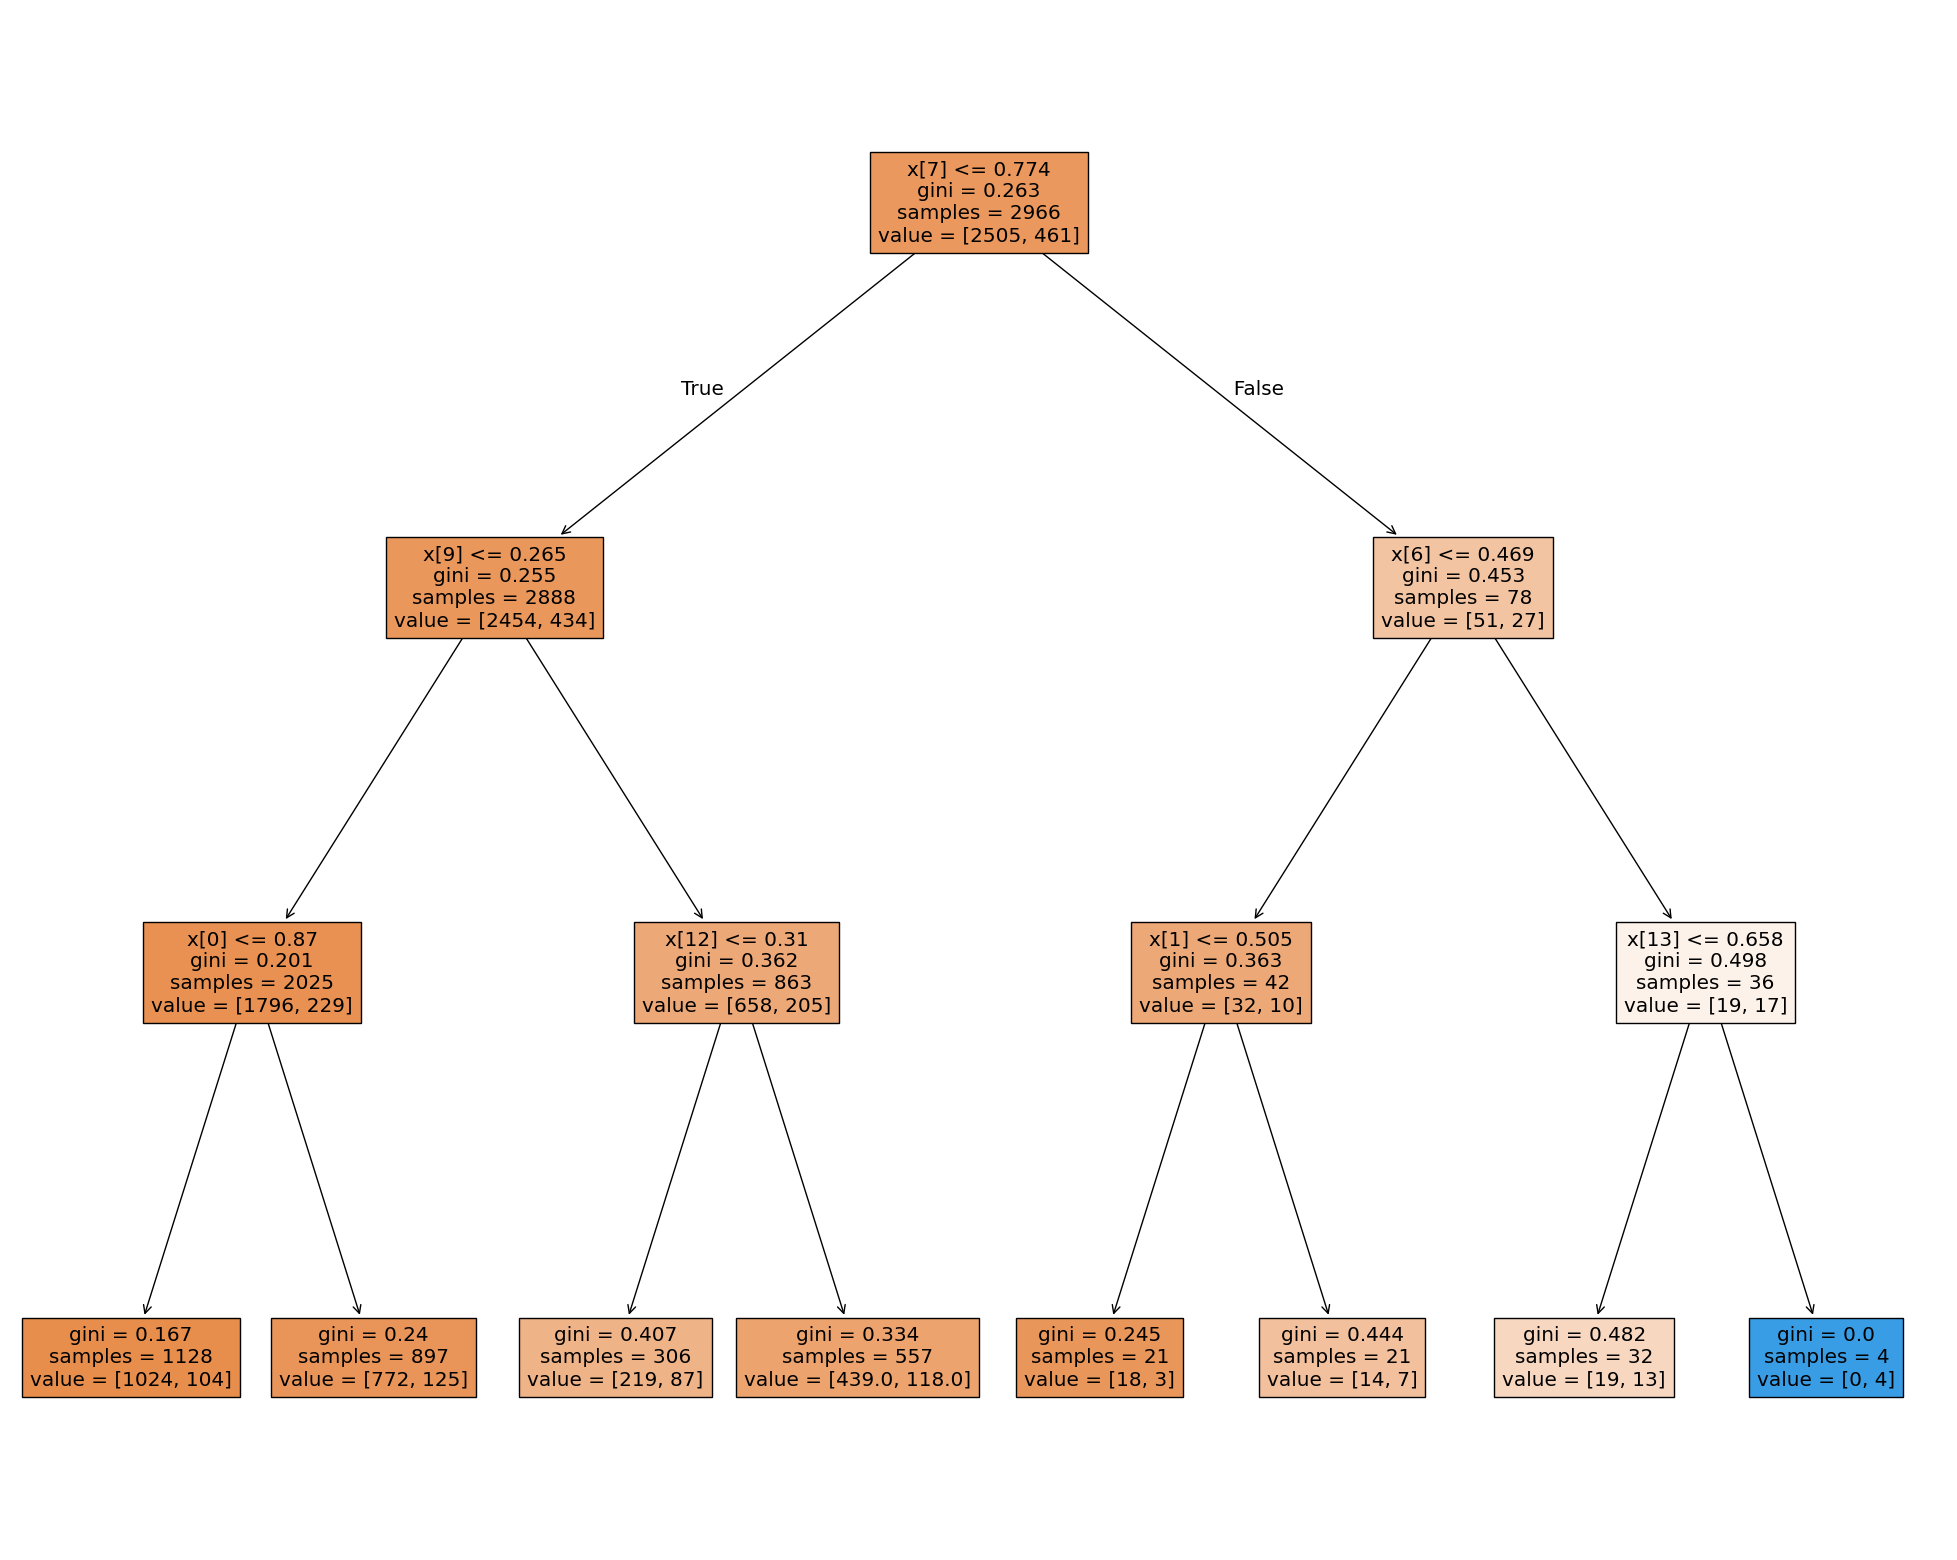

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
plt.figure(figsize=(25,20))
tree.plot_tree(DTmodel,filled=True)

**Check algorithm efficiency**

In [75]:

LRy_pred = LRmodel.predict(x_test)
RCy_pred = RCmodel.predict(x_test)

In [76]:
print ("Accuracy of Dicision Tree is ", accuracy_score(y_test,DTy_pred)*100)
print ("Accuracy is Logistic Regression is  ", accuracy_score(y_test,LRy_pred)*100)
print ("Accuracy is Random Forest Classifier is ", accuracy_score(y_test,RCy_pred)*100)

Accuracy of Dicision Tree is  85.77044025157232
Accuracy is Logistic Regression is   85.84905660377359
Accuracy is Random Forest Classifier is  85.84905660377359


In [77]:
df["TenYearCHD"].value_counts() #checking the data is balanced or not

TenYearCHD
0    3594
1     644
Name: count, dtype: int64

**In the data, 0 is present in approximately 84.80% of the cases, and 1 is present in approximately 15.20% of the cases,so the data is unbalanced ,in the case of unbalanced data we use recall ,presicion and F1 score**

**1)Recall**

In [90]:
from sklearn.metrics import recall_score

In [105]:
recall_score(y_test,DTy_pred)

0.01092896174863388

In [92]:
recall_score(y_test,LRy_pred)

0.04371584699453552

In [93]:
recall_score(y_test,RCy_pred)

0.0546448087431694

**Precision**

In [94]:
from sklearn.metrics import precision_score

In [95]:
precision_score(y_test,DTy_pred)

1.0

In [96]:
precision_score(y_test,LRy_pred)

0.6153846153846154

In [85]:
precision_score(y_test,RCy_pred)

0.5882352941176471

**F1 score**

In [86]:
from sklearn.metrics import f1_score

In [87]:
f1_score(y_test,DTy_pred)

0.021621621621621623

In [88]:
f1_score(y_test,LRy_pred)

0.08163265306122448

In [89]:
f1_score(y_test,RCy_pred)

0.1

In [103]:
print(classification_report(DTy_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92      1270
           1       0.01      1.00      0.02         2

    accuracy                           0.86      1272
   macro avg       0.51      0.93      0.47      1272
weighted avg       1.00      0.86      0.92      1272



**Here in the case  of heart disease the model pridicton of "no heart problem" instant of pridicting "heart problem" is  dangeorus for pateint so we consider the  recall criteria beacuse the model predict 1 instant of 0 is most dangerous situation for pateint.** 

**so the highest recall score is given by Decision Tree Model**

In [101]:
pwd

'C:\\Users\\Lenovo\\Muskan\\Ml\\final project'

In [102]:
#save model into pickel file
DT_model="HeartDisease.pkl"
joblib.dump(cv, DT_model)

['HeartDisease.pkl']